# Business task:
**Identify potential growth opportunities and provide recommendations for improving Bellabeat's marketing strategy based on trends in smart device usage.**

# Install and loading packages

In [1]:
# install and load packages
install.packages("tidyverse")
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
install.packages("readr")
install.packages("lubridate")
install.packages("tidyr")
install.packages("dplyr")
install.packages("ggplot2")

library(readr)
library(lubridate)
library(tidyr)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Load Csv files and print column names

In [3]:
install.packages("readr")
library(readr)

#load csv files
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
colnames(daily_activity)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [4]:
# load the csv files

sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

# Checking for number of distinct rows in each dataset

In [5]:
install.packages("dplyr")
library(dplyr)
#no.of distinct rows and total rows in daily activity and sleep day datasets
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
nrow(daily_activity)
nrow(sleep_day)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


[1] 33

[1] 24

[1] 940

[1] 413

# Checking for missing values

In [6]:
#checking for missing values
if(any(is.na(daily_activity))){
  print("Missing values are present")
}else{
  print("No missing values")}

if(any(is.na(sleep_day))){
  print("Missing values are present")
}else{
  print("No missing values")}

[1] "No missing values"
[1] "No missing values"


# Checking for duplicates

In [7]:
# check duplicates
if (any(duplicated(daily_activity[c("Id", "ActivityDate")]))) {
  print("There are duplicates in the dailyActivity dataset")
} else {
  print("There are no duplicates in the dailyActivity dataset ")
}

if (any(duplicated(sleep_day[c("Id", "SleepDay")]))) {
  print("There are duplicates in the dailyActivity dataset")
} else {
  print("There are no duplicates in the dailyActivity dataset ")
}

[1] "There are no duplicates in the dailyActivity dataset "
[1] "There are duplicates in the dailyActivity dataset"


# Find the duplicates in the sleep day dataset

In [8]:
# to find duplicates 
duplicates_in_sleepDay <- sleep_day[duplicated(sleep_day[c("Id", "SleepDay")]),]
print(duplicates_in_sleepDay)


            Id              SleepDay TotalSleepRecords TotalMinutesAsleep
162 4388161847  5/5/2016 12:00:00 AM                 1                471
224 4702921684  5/7/2016 12:00:00 AM                 1                520
381 8378563200 4/25/2016 12:00:00 AM                 1                388
    TotalTimeInBed
162            495
224            543
381            402


# Remove the duplicates

In [9]:
#to remove duplicates
sleep_day <- sleep_day %>%
  distinct(Id, SleepDay, .keep_all = TRUE)
# check again if there are any duplicates
if (any(duplicated(sleep_day[c("Id", "SleepDay")]))) {
  print("There are duplicates in the dailyActivity dataset")
} else {
  print("There are no duplicates in the dailyActivity dataset ")
}

[1] "There are no duplicates in the dailyActivity dataset "


# Import and clean hourly intensity dataset

In [10]:
# similarly let's read and clean the hourly intensity dataset 
hourly_intensity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
colnames(hourly_intensity)
if (any(is.na(hourly_intensity))){
  print("duplicates are present")
}else{
  print("There are no duplicates")
}

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

[1] "There are no duplicates"


# Import and clean hourly steps dataset

In [11]:
#read and clean hourly steps dataset
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
colnames(hourly_steps)
if(any(is.na(hourly_steps))){
  print("duplicates are present")
}else{
  print("there are no duplicates")
}

[1] "Id"           "ActivityHour" "StepTotal"

[1] "there are no duplicates"


# Checking for data types for each each dataset

In [12]:
# check each data variable in datasets
str(daily_activity)
str(sleep_day)
str(hourly_intensity)
str(hourly_steps)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

# Changing the SleepDay format from char to date

In [13]:
#changing date format in sleep day 
sleep_day$SleepDay <- as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")
sleep_day$SleepDay <- as.Date(sleep_day$SleepDay, format="%m/%d/%Y")
str(sleep_day)

'data.frame':	410 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [14]:
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


# similarly change the data types from char to date in remaining datasets

In [15]:
#changing date format in daily activity
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate,format="%m/%d/%Y")
str(daily_activity)


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 20

In [16]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [17]:
#changing date format in hourly intensity dataset
hourly_intensity$ActivityHour <- as.POSIXct(hourly_intensity$ActivityHour, format= "%m/%d/%Y %I:%M:%S %p", tz="UTC")
hourly_intensity$date <- format(hourly_intensity$ActivityHour, format = "%m/%d/%Y")
hourly_intensity$time <- format(hourly_intensity$ActivityHour, format = "%H:%M:%S")
str(hourly_intensity)



'data.frame':	22099 obs. of  6 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...
 $ date            : chr  "04/12/2016" "04/12/2016" "04/12/2016" "04/12/2016" ...
 $ time            : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...


In [18]:
#changing date format in hourly steps
hourly_steps$ActivityHour <- as.POSIXct(hourly_steps$ActivityHour, format= "%m/%d/%Y %I:%M:%S %p", tz="UTC")
hourly_steps$date <- format(hourly_steps$ActivityHour, format = "%m/%d/%Y")
hourly_steps$time <- format(hourly_steps$ActivityHour, format = "%H:%M:%S")
str(hourly_steps)

'data.frame':	22099 obs. of  5 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...
 $ date        : chr  "04/12/2016" "04/12/2016" "04/12/2016" "04/12/2016" ...
 $ time        : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...


# summary of daily activity dataset

In [19]:
#view summary of daily activity dataset
daily_activity_summary <- summary(daily_activity)
print(daily_activity_summary)


       Id             ActivityDate          TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDist

# Summary of sleep day dataset

In [20]:
# view summaryof sleep day dataset
sleep_day_summary <- summary(sleep_day)
print(sleep_day_summary)

       Id               SleepDay          TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :1.00      Min.   : 58.0     
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.:1.00      1st Qu.:361.0     
 Median :4.703e+09   Median :2016-04-27   Median :1.00      Median :432.5     
 Mean   :4.995e+09   Mean   :2016-04-26   Mean   :1.12      Mean   :419.2     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :3.00      Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.8  
 Median :463.0  
 Mean   :458.5  
 3rd Qu.:526.0  
 Max.   :961.0  


# from the summary :
**•Total Steps and Total Distance:** The close values of median and mean indicate a relatively symmetric data distribution, suggesting that most users are only lightly active. However, the high maximum values point to the presence of outliers with extremely high activity levels.



**•Very Active Minutes:** The significant gap between the median and mean values indicates a mix of highly active and less active users. The low median suggests most users engage in minimal high-intensity activity, while the higher mean is influenced by outliers with intense activity levels. Prioritizing very active minutes over distance better captures vigorous activities like HIIT.


**•Sedentary Minutes:** High median and mean values reflect a largely sedentary user base, highlighting the need to promote increased physical activity.


**•Calories:** Moderate median and mean values suggest moderate energy expenditure, but the wide range of values indicates diverse activity levels among users. This underscores the need for personalized interventions based on individual activity metrics.

# Visualization 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



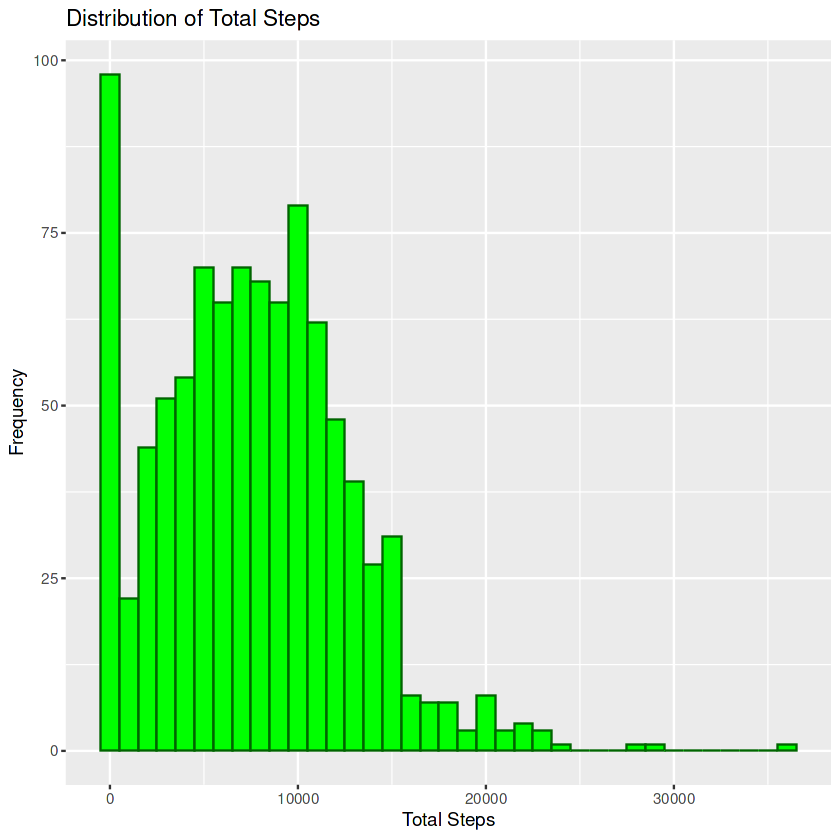

In [21]:
#install and load ggplot package
install.packages("ggplot2")
library(ggplot2)
#plot histogram - distribution of total steps
ggplot(daily_activity) +
  geom_histogram(aes(x = TotalSteps), binwidth = 1000, fill = "green", color = "darkgreen") +
  labs(title = "Distribution of Total Steps", x = "Total Steps", y = "Frequency")


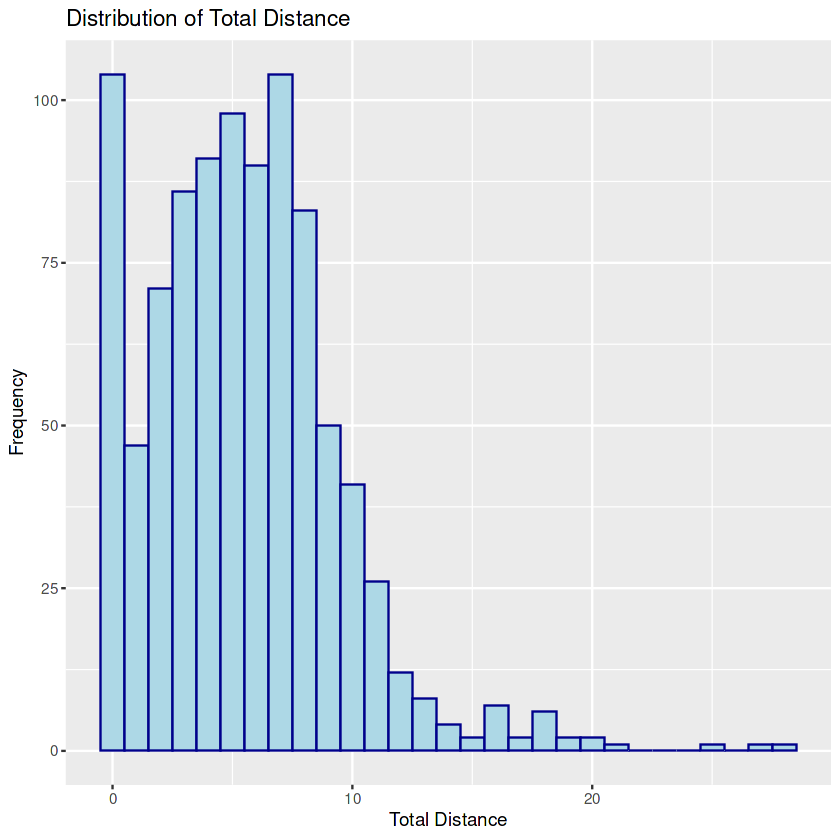

In [22]:
#distribution of total distance
ggplot(daily_activity) +
  geom_histogram(aes(x = TotalDistance), binwidth = 1, fill = "lightblue", color = "darkblue") +
  labs(title = "Distribution of Total Distance", x = "Total Distance", y = "Frequency")


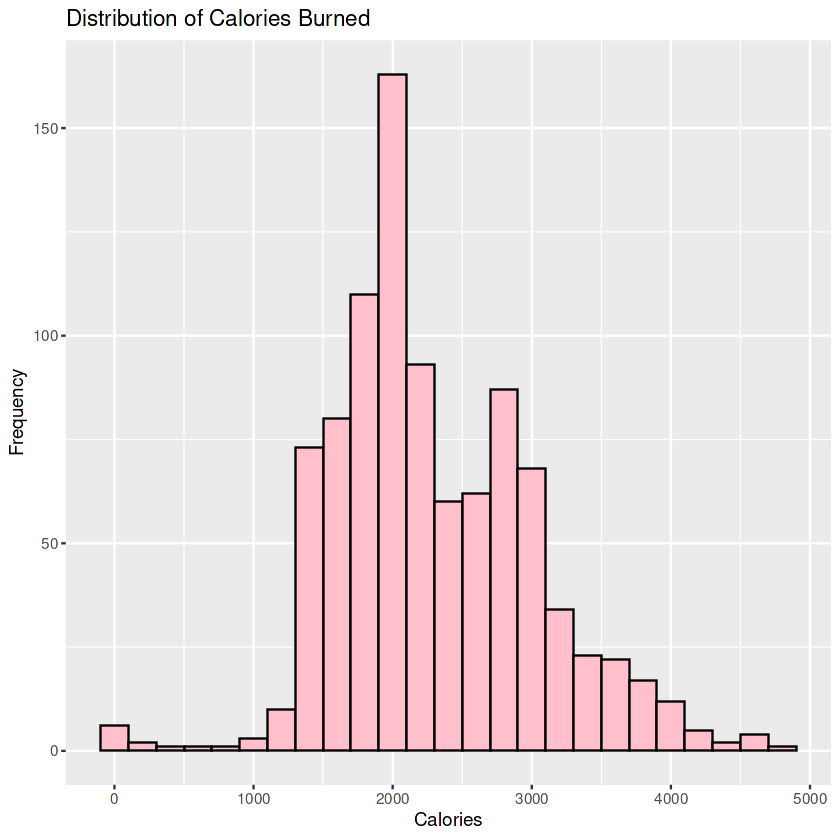

In [23]:
#distribution of calories burned
ggplot(daily_activity) +
  geom_histogram(aes(x = Calories), binwidth = 200, fill = "pink", color = "black") +
  labs(title = "Distribution of Calories Burned", x = "Calories", y = "Frequency")


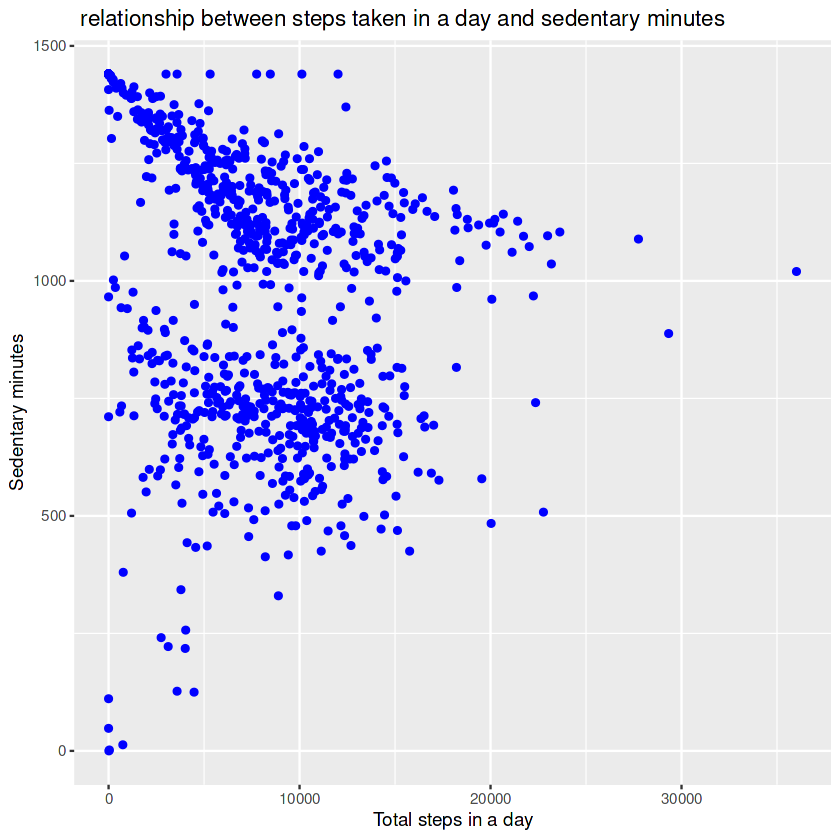

In [24]:
#relationship between steps taken in a day and sedentary minutes
ggplot(daily_activity) + 
  geom_point(aes(x=TotalSteps, y=SedentaryMinutes), colour="blue")+ 
  labs(title=" relationship between steps taken in a day and sedentary minutes", x="Total steps in a day", y="Sedentary minutes")


# Merging two datasets

In [25]:
#merging two datasets
combined_data <- merge(sleep_day, daily_activity, by="Id")
head(combined_data)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,2016-04-12,1,327,346,2016-05-06,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,2016-04-12,1,327,346,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,2016-04-12,1,327,346,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,2016-04-12,1,327,346,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797


In [26]:
#no.of distinct ids
n_distinct(combined_data)

[1] 12348

In [27]:
colnames(daily_activity)
colnames(sleep_day)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [28]:
#change the date coulmn names
daily_activity <- daily_activity %>% 
  rename(date = ActivityDate) 

colnames(daily_activity)

sleep_day <- sleep_day %>% 
  rename(date = SleepDay)

colnames(sleep_day)

[1] "Id"                       "date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "date"               "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [29]:
head(daily_activity)
head(sleep_day)

Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


In [30]:
#combine daily activity and sleep day as per the id and date
combined_data <- merge(daily_activity, sleep_day, by=c("Id","date"))
names(combined_data)
head(combined_data)


[1] "Id"                       "date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "TotalSleepRecords"       
[17] "TotalMinutesAsleep"       "TotalTimeInBed"

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


In [31]:
n_distinct(combined_data)
head(combined_data)
nrow(combined_data)


[1] 410

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


[1] 410

# Summary of combined data

In [32]:
#summary of combined data
summary(combined_data)
summary(select(combined_data, -Id, -date))

       Id                 date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.: 5189   1st Qu.: 3.592  
 Median :4.703e+09   Median :2016-04-27   Median : 8913   Median : 6.270  
 Mean   :4.995e+09   Mean   :2016-04-26   Mean   : 8515   Mean   : 6.012  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:11370   3rd Qu.: 8.005  
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :22770   Max.   :17.540  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.010   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 3.592   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 6.270   Median :0.0000           Median : 0.570    
 Mean   : 6.007   Mean   :0.1089           Mean   : 1.446    
 3rd Qu.: 7.950   3rd Qu.:0.0000           3rd Qu.: 2.360    
 Max.   :17.540   Max.   :4.0817           Max.   :12.540    
 ModeratelyActiveDistance LightActiveDist

   TotalSteps    TotalDistance    TrackerDistance  LoggedActivitiesDistance
 Min.   :   17   Min.   : 0.010   Min.   : 0.010   Min.   :0.0000          
 1st Qu.: 5189   1st Qu.: 3.592   1st Qu.: 3.592   1st Qu.:0.0000          
 Median : 8913   Median : 6.270   Median : 6.270   Median :0.0000          
 Mean   : 8515   Mean   : 6.012   Mean   : 6.007   Mean   :0.1089          
 3rd Qu.:11370   3rd Qu.: 8.005   3rd Qu.: 7.950   3rd Qu.:0.0000          
 Max.   :22770   Max.   :17.540   Max.   :17.540   Max.   :4.0817          
 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   :0.010      
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.:2.540      
 Median : 0.570     Median :0.4200           Median :3.665      
 Mean   : 1.446     Mean   :0.7439           Mean   :3.791      
 3rd Qu.: 2.360     3rd Qu.:1.0375           3rd Qu.:4.918      
 Max.   :12.540     Max.   :6.4800           Max.   :9.480      
 SedentaryAct

The summary of the total_steps column shows that the average daily step count is below the CDC's recommended level. This prompts further investigation into the frequency and intensity of individuals' walking habits throughout the day.



# Further analysis 

In [33]:
# install and load tidyr package
install.packages("tidyr")
library(tidyr)
# hourly steps and intensity over time
steps_over_time <- hourly_steps %>%
  group_by(time) %>%
  drop_na() %>%
  summarize(mean_total_steps = mean(StepTotal))

steps_over_time

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



time,mean_total_steps
<chr>,<dbl>
00:00:00,42.188437
01:00:00,23.102894
02:00:00,17.110397
03:00:00,6.426581
04:00:00,12.699571
05:00:00,43.869099
06:00:00,178.508056
07:00:00,306.049409
08:00:00,427.544576


Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


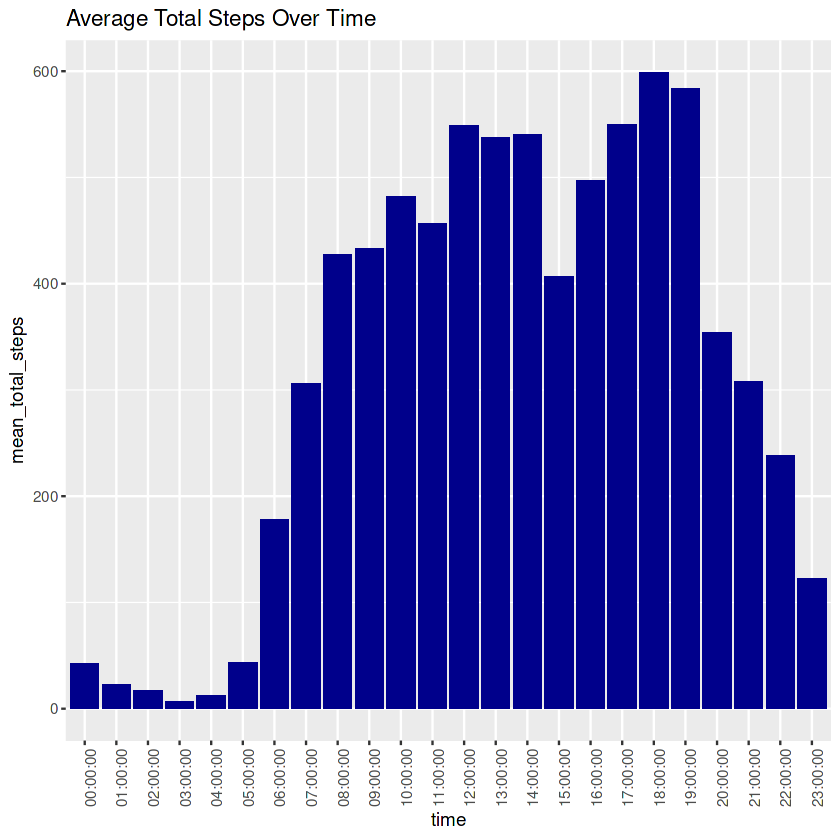

In [34]:
#plot of average total steps over time
ggplot(data=steps_over_time, aes(x=time, y=mean_total_steps)) + 
  geom_histogram(stat = "identity", fill='darkblue') +
  labs(title="Average Total Steps Over Time")+  
  theme(axis.text.x = element_text(angle = 90)) 

In [35]:
# intensity over time
intensity_over_time <- hourly_intensity %>% 
  group_by(time) %>% 
  drop_na() %>% 
  summarize(mean_total_intensity= mean(TotalIntensity))

intensity_over_time

time,mean_total_intensity
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299
04:00:00,0.6330472
05:00:00,4.9506438
06:00:00,7.7712137
07:00:00,10.7336198
08:00:00,14.6680988


Warning message in geom_histogram(aes(x = time, y = mean_total_intensity), stat = "identity", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


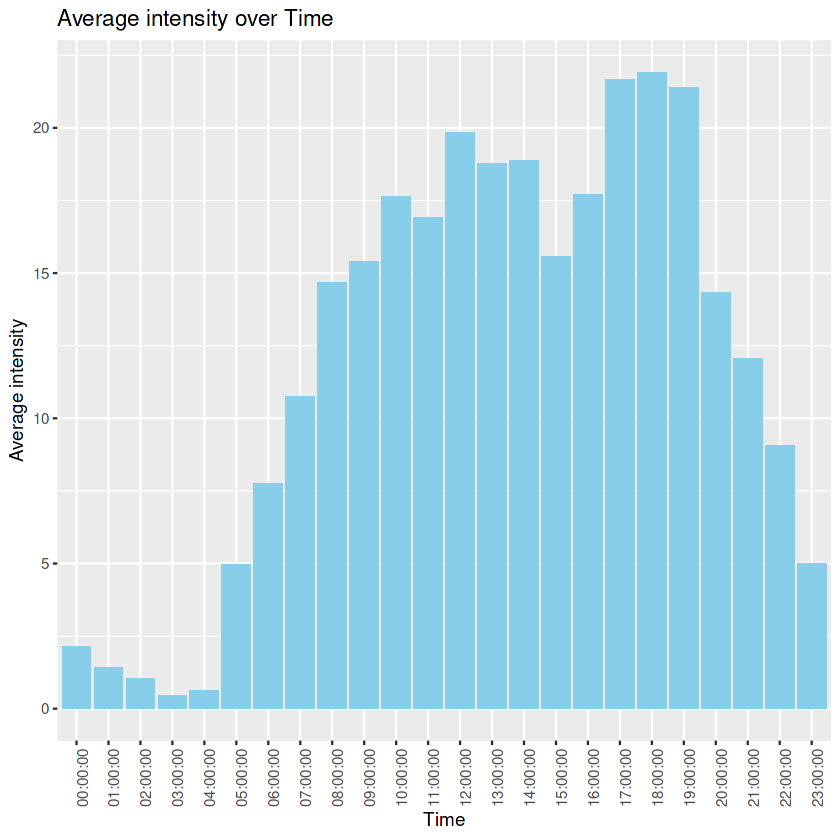

In [36]:
#average intensity over time
ggplot(intensity_over_time)+ 
  geom_histogram(aes(x=time, y= mean_total_intensity), stat= "identity", fill = "skyblue") + 
  labs(title = "Average intensity over Time", x="Time", y="Average intensity") + theme(axis.text.x=element_text(angle=90))


**The hourly steps and intensity data show a strong correlation, indicating that more steps coincide with higher intensity activities. Notably, both steps and intensity peak consistently between 5-7pm. This trend suggests that further investigation into the factors driving this activity could help individuals make informed lifestyle choices and achieve better health outcomes.**

In [37]:
# compare active minutes and total minutes sleep
# sum of all active minutes
combined_data$total_active_minutes <- combined_data$VeryActiveMinutes + combined_data$FairlyActiveMinutes + combined_data$LightlyActiveMinutes



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


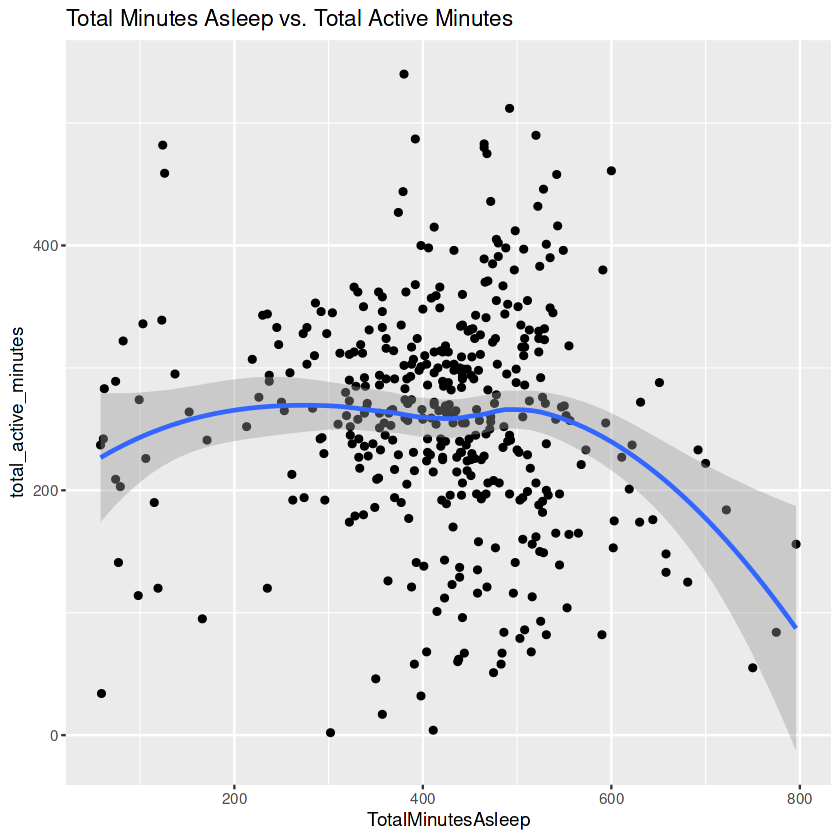

In [38]:
#total minutes of asleep vs. total active minutes
ggplot(data = combined_data, aes(x=TotalMinutesAsleep, y=total_active_minutes)) +
  geom_point() + geom_smooth() + labs(title = "Total Minutes Asleep vs. Total Active Minutes")


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


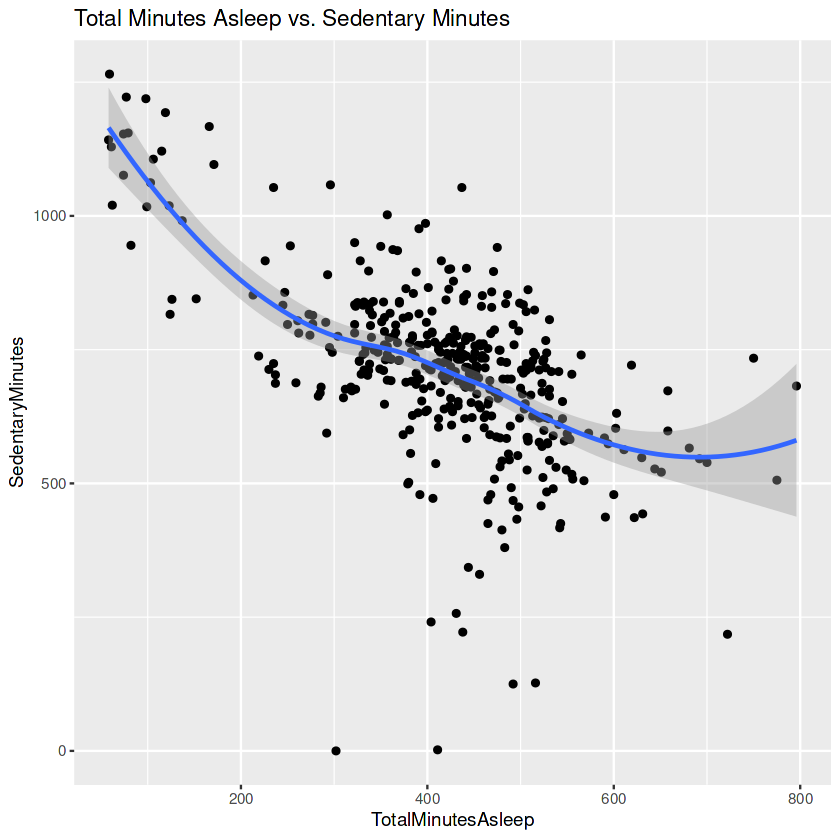

In [39]:
#total minutes asleep vs. sedentary minutes
ggplot(data = combined_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
  geom_point() + geom_smooth() + labs(title = "Total Minutes Asleep vs. Sedentary Minutes")


**The scatterplot analysis shows a notable trend that individuals with higher activity levels also tend to accrue more total minutes asleep. This suggests a positive correlation between physical activity and sleep duration, indicating that those who engage in more physical activity may experience longer and more restful sleep.**

In [40]:
#compare activity levels with calories burned
#sum of all active minutes in daily_activity datset
daily_activity$total_activity_minutes <- daily_activity$VeryActiveMinutes+ daily_activity$FairlyActiveMinutes+ daily_activity$LightlyActiveMinutes+ daily_activity$SedentaryMinutes
head(daily_activity)


Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_activity_minutes
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1094
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,1033
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1440
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,998
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,1040
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,761


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


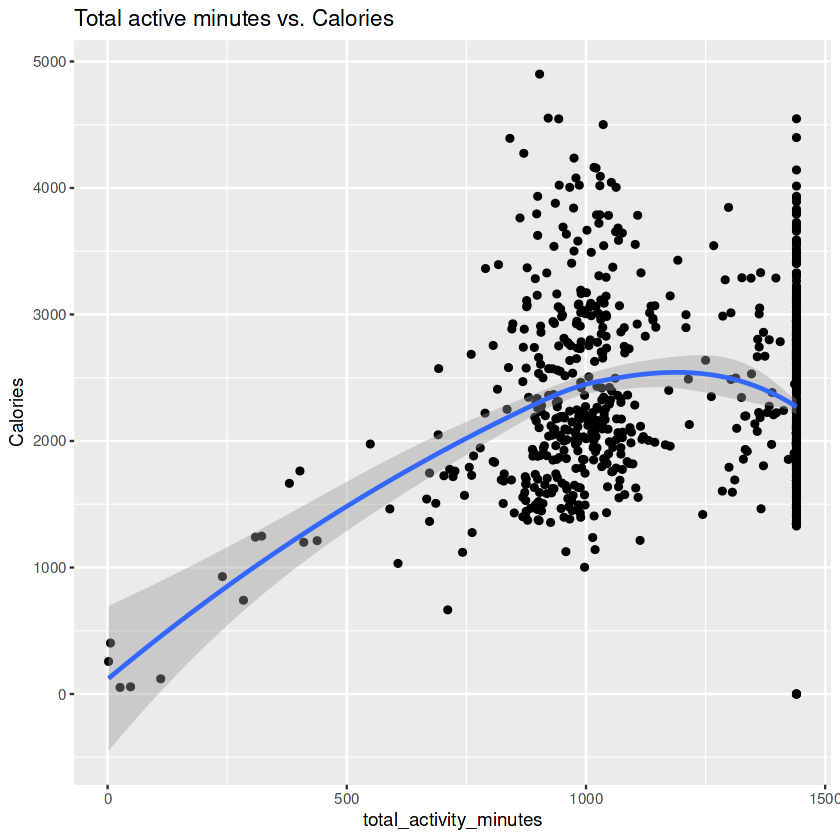

In [41]:
ggplot(data=daily_activity, aes(x=total_activity_minutes, y=Calories)) +
  geom_point() + geom_smooth() + labs(title = "Total active minutes vs. Calories")


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


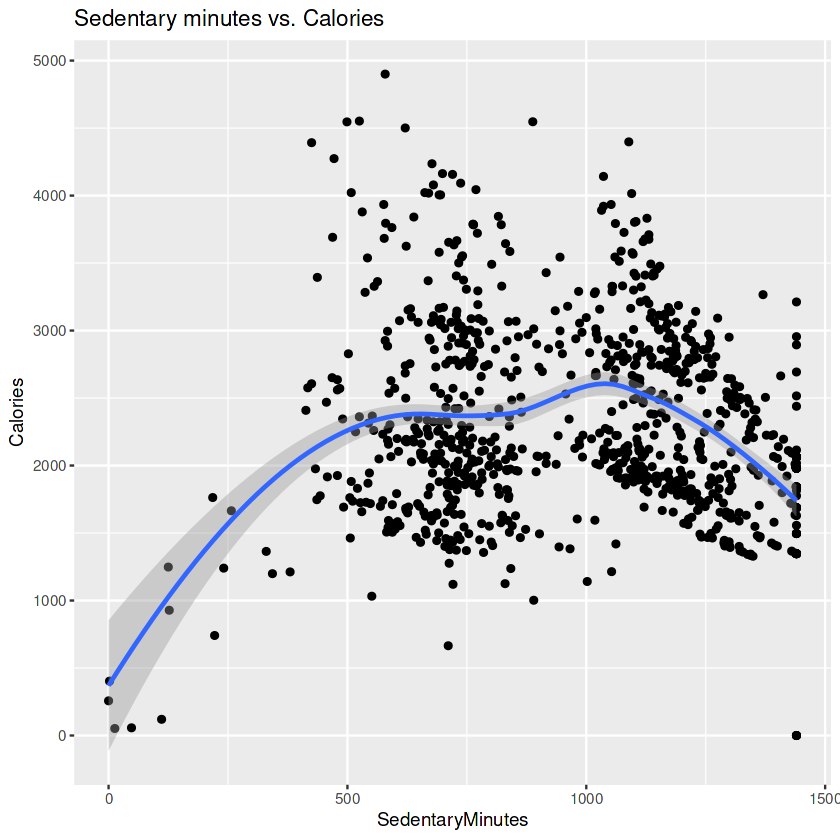

In [42]:
ggplot(data=daily_activity, aes(x=SedentaryMinutes, y=Calories)) +
  geom_point() + geom_smooth() + labs(title = "Sedentary minutes vs. Calories")


**The analysis reveals a positive correlation between active minutes and calories burned. This finding underscores the intuitive connection between physical activity levels and energy expenditure, indicating that individuals who engage in more active minutes tend to burn more calories.**

# conclusion
The analysis of the Bellabeat data reveals several key insights that can significantly enhance the user experience and improve health outcomes through strategic recommendations. 

# Key Insights:
**1. Activity and Sleep Correlation:**
* There is a positive correlation between active minutes and calories burned, confirming that increased physical activity leads to higher energy expenditure.
* Individuals who engage in higher levels of activity also tend to have more total minutes asleep, indicating a beneficial relationship between physical activity and sleep duration.

**2. Peak Activity Times:**
* The data shows that both steps and activity intensity peak between 5-7 pm, suggesting this timeframe is optimal for engaging users in physical activities.

# Recommendations:
**1. Gamification and Challenges:**
* Incorporate gamification elements into the Bellabeat platform to enhance engagement. Interactive games, virtual challenges, and achievement badges can motivate users to meet their activity goals and sustain their interest in tracking their physical activities.

**2. Guided Evening Workouts:**
* Introduce guided workout sessions specifically designed for the evening. These can be quick, effective routines that fit into busy schedules, leveraging the identified peak activity period (5-7 pm) to maximize user participation.

**3. Motivational Features:**
* Implement personalized activity goals based on individual fitness levels, and provide rewards or incentives for achieving these goals. Social sharing features can further motivate users by allowing them to compete with friends and share their accomplishments.

**4. Virtual Coaching and Support:**
* Offer virtual coaching sessions led by fitness experts and AI-powered chatbots that provide real-time advice and encouragement. Establish virtual communities where users can connect for support and accountability, fostering a sense of belonging and continuous motivation.

**5. Social Proof and Testimonials:**
* Utilize user-generated content, testimonials, and success stories to highlight the real-world benefits of using Bellabeat devices. Encouraging satisfied customers to share their positive experiences on social media and other marketing channels can enhance brand credibility and attract new users.

# Final Thoughts

**By integrating these recommendations, Bellabeat can enhance its platform, making it more engaging and effective for users. Leveraging data analytics and innovative features, Bellabeat has the potential to become a leader in the global smart device market, offering users personalized solutions for tracking activity, improving sleep quality, and optimizing calorie burning.** 

**As Bellabeat continues to innovate and expand its product offerings, it is well-positioned to make a significant impact on the lives of its users, helping them achieve their health and wellness goals and live happier, healthier lives. The insights gained from this analysis provide a strong foundation for strategic development, ensuring that Bellabeat's products not only meet but exceed user expectations.****
